In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Задание 1. Загрузите файл HR.csv в pandas dataframe.

In [75]:
data=pd.read_csv(r'\Users\super\Desktop\HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Задание 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).


In [76]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [77]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [78]:
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


# Задание 3.Рассчитать и визуализировать корреляционную матрицу для переменных.

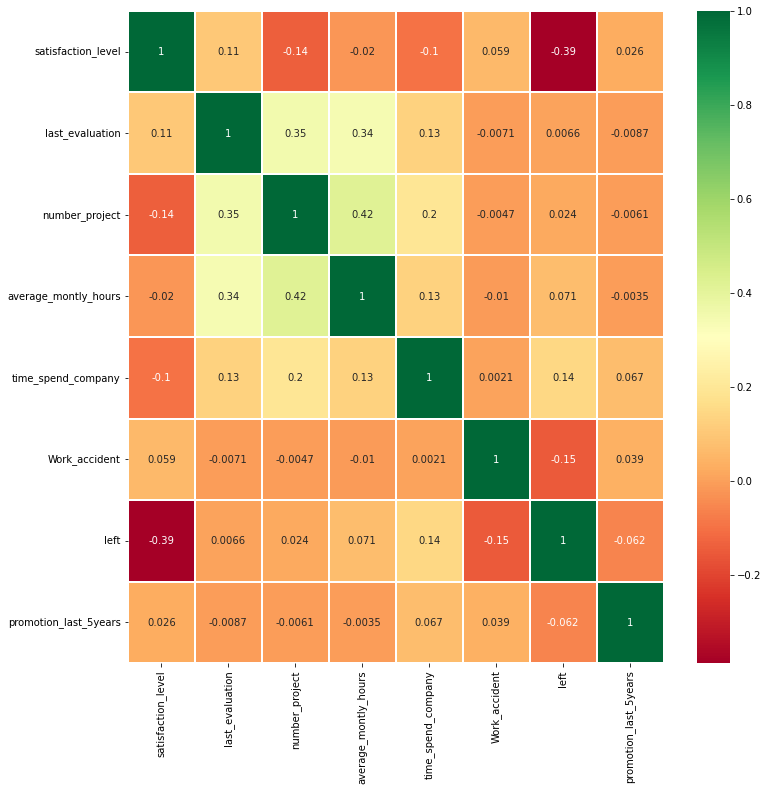

In [79]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

<div class="alert alert-block alert-success">
    <b>Вывод: Здесь мы видим, что переменные (average_monthly_hours - Среднее количество часов на рабочем месте в месяц) и (Last_evaluation - Время с момента последней оценки в годах) имеют зависимость от переменной (number_projects - Количество проектов, выполненных за время работы). Также у них заметна положительная корреляция. Переменная "Уровень удовлетворенности" и переменная "Сотрудники, которые сейчас работают" имеет отрицательную корреляцию.</b>
</div>

# Здание 4. Рассчитайте сколько сотрудников работает в каждомдепартаменте.

In [80]:
def groupby_function(data):
    return data.satisfaction_level.count()

In [81]:
print('В департаментах работает : \n', data.groupby('department').apply(groupby_function))

В департаментах работает : 
 department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64


# Задание 5. Показать распределение сотрудников по зарплатам.

In [8]:
def groupby_count(data):
    return data.satisfaction_level.count()
df=data.groupby('salary').apply(groupby_count)
df

NameError: name 'data' is not defined

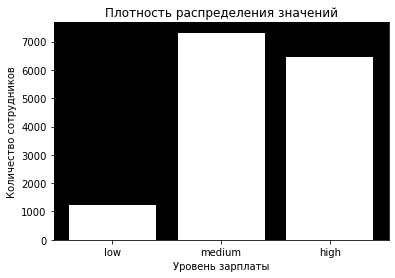

In [83]:
r=['low', 'medium' ,'high']
plt.bar(r, df, color = 'white')
plt.rcParams['axes.facecolor'] = 'black'
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.title('Плотность распределения значений')
plt.show()

<div class="alert alert-block alert-success">
    <b>Вывод: Исходя из графика можно сделать вывод, что большинство сотрудников имеет средний уровень зарплаты, низкий уровень зарплаты имеет чуть более 1 тысячи сотрудников. Высокий уровень зарплат имеет чуть меньшее количество сотрудников, чем средний уровень.</b>
</div>


# Задание 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.

In [84]:
Income_data=data.groupby(['department','salary']).apply(groupby_count).reset_index()
Income_data.columns=['department', 'salary', 'count']
Income_data

,department,salary,count
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364
5,RandD,medium,372
6,accounting,high,74
7,accounting,low,358
8,accounting,medium,335
9,hr,high,45


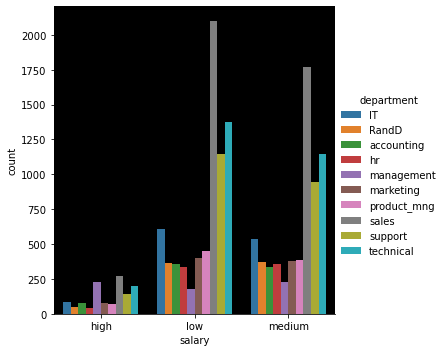

In [85]:
row=Income_data['salary']
f = Income_data['count']
sns.catplot(x='salary', y='count', hue='department', kind='bar', data=Income_data)

# Здание 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

In [86]:
df_high = list(data.loc[data['salary'] == 'high']['average_montly_hours'])
df_low = list(data.loc[data['salary'] == 'low']['average_montly_hours'])

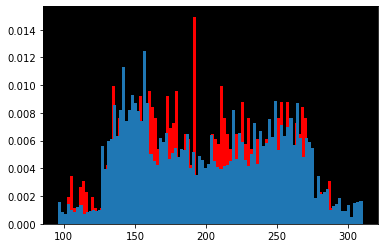

In [87]:
plt.hist(df_high, bins=100, density=True, color = 'red');
plt.hist(df_low, bins=100, density=True);


<div class="alert alert-block alert-success">
    <b>Вывод: В целом большой разницы в эффективности работы не замечено.</b>
</div>


# Задание 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

● Доля сотрудников с повышением за последние 5 лет

● Средняя степень удовлетворенности

● Среднее количество проектов

In [9]:
data_left = data.loc[data['left'] == 1]
data_left.head()

NameError: name 'data' is not defined

In [89]:
len(data_left.loc[data_left['promotion_last_5years'] == 1])/len(data_left)

0.005320638476617194

In [90]:
data_left['satisfaction_level'].mean()


0.44009801176140917

In [91]:
data_left['number_project'].mean()

3.8555026603192384

In [92]:
data_noleft = data.loc[data['left'] == 0]
data_noleft.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [93]:
len(data_noleft.loc[data_noleft['promotion_last_5years'] == 1])/len(data_noleft)

0.026251312565628283

In [94]:
data_noleft['satisfaction_level'].mean()

0.666809590479516

In [95]:
data_noleft['number_project'].mean()

3.786664333216661